# The effects of L1 and L2 on polynomial regression

## Code example 1

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../workshop-datafiles/poly_data.csv')

rows, cols = data.shape

print("Data has {} rows with  {} columns".format(rows, cols))
data.head()

Data has 60 rows with  2 columns


,y,x
0,1.065763,1.047198
1,1.006086,1.117011
2,0.695374,1.186824
3,0.949799,1.256637
4,1.063496,1.326450


## Code example 2

In [4]:
# Separate the data into features and response.
predictors = ['x']
response = ['y']

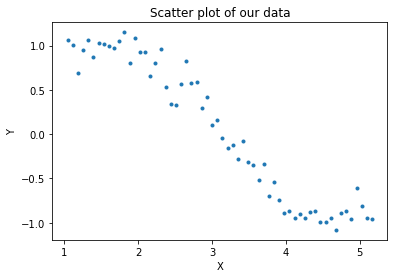

In [5]:
# Visualize the data
plt.plot(data[predictors], data[response], '.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of our data')
plt.show()

## Code example 3

In [6]:
# Lets fit a linear regression model to this data
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression(normalize=True)
lr1.fit(data[predictors], data[response])
y_pred = lr1.predict(data[predictors])

Model MSE: 0.05467192664907907


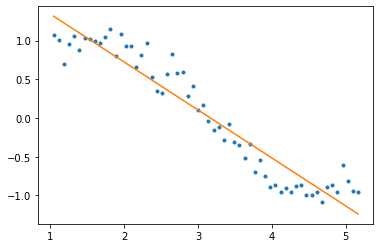

In [7]:
#Evaluate our model with mean square error
mse1 = np.mean((y_pred - data[response])**2)   # This is the average
print("Model MSE: {}".format(mse1[0]))
plt.plot(data['x'], data['y'], '.', data['x'], y_pred, '-')
plt.show()

## Code example 4:

In [8]:
#We are going to add columns to our exiting data frame

#To generate a name starting with a character and ending with a number, lets try this:
print("x_%d"%5)

x_5


In [9]:
for i in range(2,6):
   colname = "x_%d"%i
   data[colname] = data.x**i   # Add more columns with higher powers

data.head()

,y,x,x_2,x_3,x_4,x_5
0,1.065763,1.047198,1.096623,1.148381,1.202581,1.259340
1,1.006086,1.117011,1.247713,1.393709,1.556788,1.738948
2,0.695374,1.186824,1.408551,1.671702,1.984016,2.354677
3,0.949799,1.256637,1.579137,1.984402,2.493673,3.133642
4,1.063496,1.326450,1.759470,2.333850,3.095735,4.106339


## Code example 5

Model MSE: 0.016976226592901714


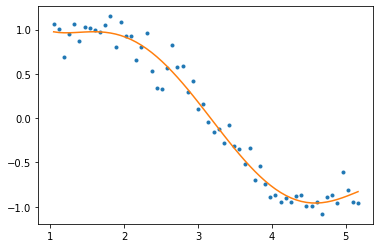

In [10]:
predictors = data.columns.values[1:]
lr2 = LinearRegression(normalize=True)
lr2.fit(data[predictors], data[response])
y_pred2 = lr2.predict(data[predictors])

#Evaluate our model with mean square error
mse2 = np.mean((y_pred2 - data[response])**2)
print("Model MSE: {}".format(mse2[0]))

plt.plot(data['x'], data['y'], '.', data['x'], y_pred2, '-')
plt.show()

Model MSE: 0.018389196563564168


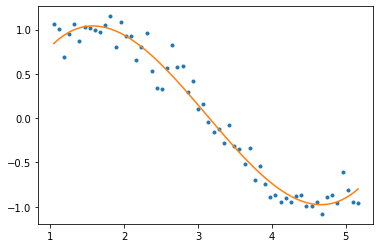

In [11]:
predictors = data.columns.values[1:]
lr2 = LinearRegression(normalize=True)
lr2.fit(data[predictors[:3]], data[response])
y_pred2 = lr2.predict(data[predictors[:3]])

#Evaluate our model with mean square error
mse2 = np.mean((y_pred2 - data[response])**2)
print("Model MSE: {}".format(mse2[0]))

plt.plot(data['x'], data['y'], '.', data['x'], y_pred2, '-')
plt.show()

In [12]:
print(lr2.coef_)

[[ 3.0315657  -1.28552808  0.13729199]]


## Code example 6:

In [13]:
for i in range(2,16):
   colname = "x_%d"%i
   data[colname] = data.x**i

data.head()

,y,x,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.065763,1.047198,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.006086,1.117011,1.247713,1.393709,1.556788,1.738948,1.942424,2.169708,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,0.695374,1.186824,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,0.949799,1.256637,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819709,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.063496,1.326450,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


Model MSE: y    0.011747
dtype: float64


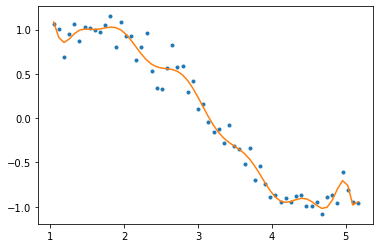

In [14]:
predictors = data.columns.values[1:]
lr3 = LinearRegression(normalize=True)
lr3.fit(data[predictors], data[response])
y_pred3 = lr3.predict(data[predictors])

#Evaluate our model with mean square error
mse3 = np.mean((y_pred3 - data[response])**2)
print("Model MSE: {}".format(mse3))
plt.plot(data['x'], data['y'], '.', data['x'], y_pred3, '-')
plt.show()

In [15]:
print(lr3.coef_)

[[ 2.43873374e+05 -7.45919477e+05  1.37631468e+06 -1.71383440e+06
   1.52631804e+06 -1.00487807e+06  4.98342864e+05 -1.87832673e+05
   5.38509221e+04 -1.16575286e+04  1.87294965e+03 -2.16379870e+02
   1.69849594e+01 -8.10728452e-01  1.77542886e-02]]


## Code example 7

In [16]:
print("MSE Simple LR: {}".format(mse1[0]))
print("MSE Polynomial LR with power = 5:  {}".format(mse2[0]))
print("MSE Polynomial LR with power = 15: {}".format(mse3[0]))

MSE Simple LR: 0.05467192664907907
MSE Polynomial LR with power = 5:  0.018389196563564168
MSE Polynomial LR with power = 15: 0.011746955424041382


In [17]:
print("Coefficients Simple LR: {}".format(lr1.coef_))
print()
print("Coefficients Polynomial LR with power = 5:  {}".format(lr2.coef_))
print()
print("Coefficients Polynomial LR with power = 15: {}".format(lr3.coef_))

Coefficients Simple LR: [[-0.61957457]]

Coefficients Polynomial LR with power = 5:  [[ 3.0315657  -1.28552808  0.13729199]]

Coefficients Polynomial LR with power = 15: [[ 2.43873374e+05 -7.45919477e+05  1.37631468e+06 -1.71383440e+06
   1.52631804e+06 -1.00487807e+06  4.98342864e+05 -1.87832673e+05
   5.38509221e+04 -1.16575286e+04  1.87294965e+03 -2.16379870e+02
   1.69849594e+01 -8.10728452e-01  1.77542886e-02]]


# L2 Regularised linear regression

## Code example 8

          y         x       x_2       x_3       x_4       x_5       x_6  \
0  1.065763  1.047198  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.006086  1.117011  1.247713  1.393709  1.556788  1.738948  1.942424   
2  0.695374  1.186824  1.408551  1.671702  1.984016  2.354677  2.794587   
3  0.949799  1.256637  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.063496  1.326450  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169708  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819709  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

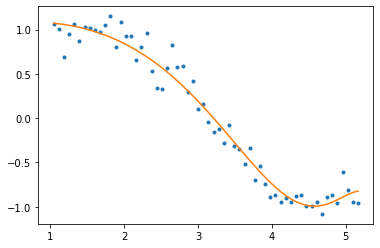


Model MSE: 0.018916257918692878

Model Coeff: [[ 1.21303173e-01 -6.94156079e-02 -1.57127609e-02 -2.22135504e-03
  -1.87641517e-04  9.20231813e-06  8.64853953e-06  2.50183053e-06
   5.43898711e-07  9.86145333e-08  1.46765431e-08  1.46917382e-09
  -6.50509217e-11 -9.35906282e-11 -3.58880160e-11]]


In [18]:
from sklearn.linear_model import Ridge

print(data.head())

#call the ridge regression model with penalty (lambda) = 0.003
ridgelr = Ridge(alpha=0.003, normalize=True) # change lambda value here
#ridgelr = Ridge(alpha=100, normalize=True) # change lambda value here

#Fit our data
ridgelr.fit(data[predictors], data[response])

data.head()

# Do a prediction
y_pred4 = ridgelr.predict(data[predictors])

#Evaluate our model with mean square error
mse4 = np.mean((y_pred4 - data[response])**2)
plt.plot(data['x'], data['y'], '.', data['x'], y_pred4, '-')
plt.show()
print()
print("Model MSE: {}".format(mse4[0]))
print()
print("Model Coeff: {}".format(ridgelr.coef_))

# L1 Regularised Linear Regression

## Code example 9

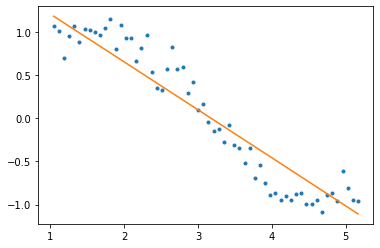


Model MSE: 0.060651189731085776

Model Coeff: [-0.55206563 -0.00056232 -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.          0.          0.        ]


In [19]:
from sklearn.linear_model import Lasso

#call the lasso regression model with penalty (alpha) = 0.01
# we also specify the max number of iterations as 10^5
lassoreg = Lasso(alpha=0.01,normalize=True, max_iter=1e5) # change lambda value here

#Fit our data
lassoreg.fit(data[predictors], data[response])

# Do a prediction
y_pred5 = lassoreg.predict(data[predictors])

#Evaluate our model with mean square error
mse5 = np.mean((y_pred5 - data['y'])**2)

plt.plot(data['x'], data['y'], '.', data['x'], y_pred5, '-')
plt.show()
print()
print ("Model MSE: {}".format(mse5))
print()
print("Model Coeff: {}".format(lassoreg.coef_))

# Regularised Logistic Regression

## Code example 1

In [20]:
exam_data = pd.read_csv('../workshop-datafiles/ExamScores.csv')

rows, cols = exam_data.shape
print("Data has: {} rows and {} cols".format(rows, cols))

exam_data.head()

Data has: 100 rows and 3 cols


,Exam1,Exam2,Admit
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Code example 2

In [21]:
from sklearn.model_selection import train_test_split

Dtrain,Dtest = train_test_split(exam_data, test_size=0.3)

print(Dtrain.shape)
print(Dtest.shape)

(70, 3)
(30, 3)


## Code example 3

In [22]:
predictors = ['Exam1', 'Exam2']
response = ['Admit']

print(Dtrain[predictors].head())
print()
print(Dtest[predictors].head())

        Exam1      Exam2
27  93.114389  38.800670
76  47.264269  88.475865
63  30.058822  49.592974
9   84.432820  43.533393
62  56.253817  39.261473

        Exam1      Exam2
6   61.106665  96.511426
47  97.771599  86.727822
15  53.971052  89.207350
56  97.645634  68.861573
57  32.577200  95.598548


# Regularisation using L1 and L2

## Code example 4

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lambda_val = 0.1    # The larger lambda is the stringer the penalty
#Initialize the Logitic regression model with l2 penalty
# C is an additional penalty term. You need to be careful when you play with this penalty term. 
lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(Dtrain[predictors], Dtrain['Admit'])
y_predict = lr.predict(Dtest[predictors])

#Evaluate our model
model_acc = accuracy_score(y_predict, Dtest['Admit'])
print("Model Accuracy is: {}".format(model_acc))

print("Model Coeff: {}".format(np.append(lr.intercept_, lr.coef_)))

Model Accuracy is: 0.9
Model Coeff: [-25.03014503   0.19431122   0.21025811]


In [24]:
#SGDClassifier?


## Code example 5

Next we need to tune the hyper params using the info from before.

In [25]:
def runLRmodel(trials, data, predictors, label, penalty_type, penalty_score):

   model_acc     = 0
   model_weights = np.zeros([1,3])

   for i in range(0,trials):
      Dtrain, Dtest = train_test_split(data, test_size=0.3)
      lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type,solver='liblinear')
      lr.fit(Dtrain[predictors], Dtrain[label])
      y_predict = lr.predict(Dtest[predictors])
      model_acc += accuracy_score(y_predict, Dtest[label])
      model_weights += np.append(lr.intercept_, lr.coef_)

   model_acc /= trials
   model_weights /= trials

   return np.round(model_acc, decimals=2), np.round(model_weights,decimals=2)

## Code example 6

In [26]:
import warnings
warnings.filterwarnings('ignore')
lambda_vals = [.0001,.0003,.001,.003,.01,.03,.1,.3,1,3,5,10]
l2_acc = np.zeros(len(lambda_vals))
index = 0
#L2 regularization
for l in lambda_vals:
   l2_acc[index], w = runLRmodel(500,exam_data, predictors, 'Admit', 'l2', np.float(l))
   index += 1

print("Acc: {}".format(l2_acc))
# penalty at which validation accuracy is maximum
max_index_l2  = np.argmax(l2_acc)
best_lambda = lambda_vals[max_index_l2]
print("Best Lambda: {}".format(best_lambda))

Acc: [0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.9  0.8  0.66 0.62 0.61]
Best Lambda: 0.3


## Code example 7

In [27]:
def runLRmodel2(trials, data, predictors, label, penalty_type, penalty_score):

   model_acc     = 0
   model_weights = np.zeros([1,3])

   for i in range(0,trials):
      Dtrain, Dtest = train_test_split(data, test_size=0.3)
      lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type,solver='liblinear')
      lr.fit(Dtrain[predictors], Dtrain[label])
      y_predict = lr.predict(Dtest[predictors])
      model_acc += accuracy_score(y_predict, Dtest[label])
      model_weights += np.append(lr.intercept_, lr.coef_)

   model_acc /= trials
   model_weights /= trials

   return np.round(model_acc, decimals=2), np.round(model_weights,decimals=2)

In [28]:
import warnings
warnings.filterwarnings('ignore')
alpha_vals = [.0001,.0003,.001,.003,.01,.03,.1,.3,1,3,5,10]
l1_acc = np.zeros(len(alpha_vals))
print(l1_acc)
index = 0
#L2 regularization
for l in alpha_vals:
   l1_acc[index], w = runLRmodel2(500,exam_data, predictors, 'Admit', 'l1', np.float(l))
   index += 1

print("Acc: {}".format(l1_acc))
# penalty at which validation accuracy is maximum
max_index_l1  = np.argmax(l1_acc)
best_alpha = alpha_vals[max_index_l1]
print("Best Alpha: {}".format(best_alpha))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Acc: [0.89 0.89 0.89 0.88 0.89 0.89 0.89 0.89 0.9  0.8  0.61 0.61]
Best Alpha: 1


## Code example 8

Generally L1 is better than L2 if you apply a stronger penalty (1-5). But penalty of .1, or 6-8 is better for L2

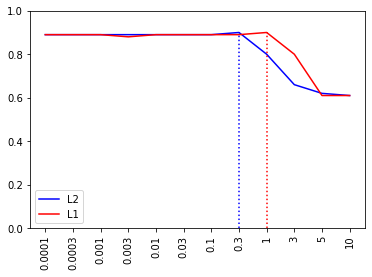

In [29]:
#plot the accuracy curve
plt.plot(range(0,len(lambda_vals)), l2_acc, color='b', label='L2')
plt.plot(range(0,len(lambda_vals)), l1_acc, color='r', label='L1')
#replace the x-axis labels with penalty values
plt.xticks(range(0,len(lambda_vals)), lambda_vals, rotation='vertical')

#Highlight the best values of alpha and lambda
plt.plot((max_index_l2, max_index_l2), (0, l2_acc[max_index_l2]), ls='dotted', color='b')
plt.plot((max_index_l1, max_index_l1), (0, l1_acc[max_index_l1]), ls='dotted', color='r')

#Set the y-axis from 0 to 1.0
axes = plt.gca()
axes.set_ylim([0, 1.0])

plt.legend(loc="lower left")
plt.show()

# Elastic Net for regression

## Code example #1

In [30]:
from sklearn.linear_model import SGDRegressor # this implements Elastic net regression model
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

data = pd.read_csv('../workshop-datafiles/poly_data.csv')
# Separate the data into features and response.
predictors = ['x']
response = ['y']

alpha_val = 0.1

Dtrain, Dtest = train_test_split(data, test_size=0.3)
enet = SGDRegressor(loss='squared_loss', penalty='elasticnet', alpha=alpha_val, l1_ratio=0.7, max_iter=1000) 

enet.fit(Dtrain[predictors],Dtrain[response].values.reshape((Dtrain[response].shape[0],)))
y_predict = enet.predict(Dtest[predictors])
y_predict = np.reshape(y_predict, np.shape(Dtest[response]))
mse2 = np.mean((y_predict - Dtest[response])**2)

print("Model MSE: {}".format(mse2[0]))

Model MSE: 0.1973556705323022


# Elastic Net for Classification

## Code example #2

In [31]:
from sklearn.linear_model import SGDClassifier # this implements Elastic net classification model
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

alpha_val = 0.1

exam_data = pd.read_csv('../workshop-datafiles/ExamScores.csv')
predictors = ['Exam1', 'Exam2']
response = ['Admit']

Dtrain, Dtest = train_test_split(exam_data, test_size=0.3)
enet = SGDClassifier(loss='log', penalty='elasticnet', alpha=alpha_val, l1_ratio=0.7, max_iter=1000) 
enet.fit(Dtrain[predictors], Dtrain[response].values.reshape((Dtrain[response].shape[0],)))
y_predict = enet.predict(Dtest[predictors])
enet_acc = accuracy_score(y_predict, Dtest[response])

print("Acc: {}".format(enet_acc))

Acc: 0.5333333333333333
